In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

# Problem 1

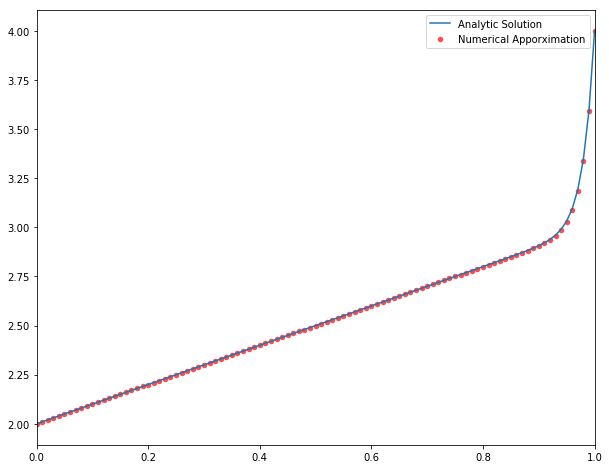

In [2]:
# eps*y'' - y' = -1
# y(0) = alpha, y(1) = beta
alpha = 2
beta = 4
epsilon = .02
N = 101
X = np.linspace(0,1,N)

def phi(i, x):
    xminus, xi, xplus = X[i-1:i+2]
    if x >= xminus and x <= xplus:
        if x <= xi:
            return (x - xminus)/(xi - xminus)
        else:
            return (xplus - x)/(xplus - xi)
    else:
        return 0

def a(i, j):
    if j == i+1:
        return .5 + epsilon/(X[i+1] - X[i])
    elif j == i:
        return -epsilon/(X[i] - X[i-1]) - epsilon/(X[i+1] - X[i])
    elif j == i-1:
        return epsilon/(X[i] - X[i-1]) - .5
    else:
        return 0
    
def l(j):
    return -.5*(X[j+1] - X[j-1])

a = np.vectorize(a)
l = np.vectorize(l)

Phi = l(np.arange(1,N-1))
Phi = np.concatenate(([alpha],Phi, [beta]))

diag0 = np.concatenate(([1.], a(np.arange(1,N-1), np.arange(1, N-1)), [1.]))
diagUp = np.concatenate(([0., 0.], a(np.arange(2, N), np.arange(1,N-1))))
diagDown = np.concatenate((a(np.arange(0,N-2), np.arange(1,N-1)), [0., 0.]))
ab = np.vstack((diagUp, diag0, diagDown))

K = la.solve_banded((1,1), ab, Phi)

def yhat(x):
    j = np.argmin(np.abs(X - x))
    if j != 0 and j != 100:
        if x >= X[j]:
            return K[j]*phi(j, x) + K[j+1]*phi(j+1,x)
        else:
            return K[j]*phi(j, x) + K[j-1]*phi(j-1,x)
vect_yhat = np.vectorize(yhat)

analytic_y = lambda x: alpha + x + (beta - alpha - 1)*((np.exp(x/epsilon) - 1)/(np.exp(1./epsilon) - 1))

#Xplot = np.linspace(0,1,300)
plt.figure(figsize=(10,8))
plt.xlim(0,1)
plt.scatter(X, K, c='red', s=30, lw=0, alpha=.7, label='Numerical Apporximation')
plt.plot(X, analytic_y(X), label='Analytic Solution')
plt.legend()
plt.show()

# Problem 2

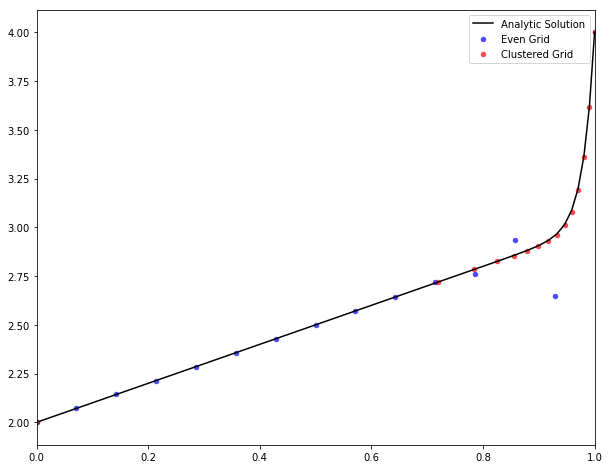

In [3]:
# eps*y'' - y' = -1
# y(0) = alpha, y(1) = beta
alpha = 2
beta = 4
epsilon = .02
N = 15
X = np.linspace(0,1,N)

def phi(i, x):
    xminus, xi, xplus = X[i-1:i+2]
    if x >= xminus and x <= xplus:
        if x <= xi:
            return (x - xminus)/(xi - xminus)
        else:
            return (xplus - x)/(xplus - xi)
    else:
        return 0

def a(i, j):
    if j == i+1:
        return .5 + epsilon/(X[i+1] - X[i])
    elif j == i:
        return -epsilon/(X[i] - X[i-1]) - epsilon/(X[i+1] - X[i])
    elif j == i-1:
        return epsilon/(X[i] - X[i-1]) - .5
    else:
        return 0
    
def l(j):
    return -.5*(X[j+1] - X[j-1])

a = np.vectorize(a)
l = np.vectorize(l)

Phi = l(np.arange(1,N-1))
Phi = np.concatenate(([alpha],Phi, [beta]))

diag0 = np.concatenate(([1.], a(np.arange(1,N-1), np.arange(1, N-1)), [1.]))
diagUp = np.concatenate(([0., 0.], a(np.arange(2, N), np.arange(1,N-1))))
diagDown = np.concatenate((a(np.arange(0,N-2), np.arange(1,N-1)), [0., 0.]))
ab = np.vstack((diagUp, diag0, diagDown))

K = la.solve_banded((1,1), ab, Phi)

def yhat(x):
    j = np.argmin(np.abs(X - x))
    if j != 0 and j != 100:
        if x >= X[j]:
            return K[j]*phi(j, x) + K[j+1]*phi(j+1,x)
        else:
            return K[j]*phi(j, x) + K[j-1]*phi(j-1,x)
vect_yhat = np.vectorize(yhat)

plt.figure(figsize=(10,8))
plt.xlim(0,1)
plt.scatter(X, K, c='blue', s=30, lw=0, alpha=.7, label='Even Grid')

# -------------------------------------------------------------------------------

# eps*y'' - y' = -1
# y(0) = alpha, y(1) = beta
alpha = 2
beta = 4
epsilon = .02
N = 15
X = np.linspace(0,1,N)**(1./8)

def phi(i, x):
    xminus, xi, xplus = X[i-1:i+2]
    if x >= xminus and x <= xplus:
        if x <= xi:
            return (x - xminus)/(xi - xminus)
        else:
            return (xplus - x)/(xplus - xi)
    else:
        return 0

def a(i, j):
    if j == i+1:
        return .5 + epsilon/(X[i+1] - X[i])
    elif j == i:
        return -epsilon/(X[i] - X[i-1]) - epsilon/(X[i+1] - X[i])
    elif j == i-1:
        return epsilon/(X[i] - X[i-1]) - .5
    else:
        return 0
    
def l(j):
    return -.5*(X[j+1] - X[j-1])

a = np.vectorize(a)
l = np.vectorize(l)

Phi = l(np.arange(1,N-1))
Phi = np.concatenate(([alpha],Phi, [beta]))

diag0 = np.concatenate(([1.], a(np.arange(1,N-1), np.arange(1, N-1)), [1.]))
diagUp = np.concatenate(([0., 0.], a(np.arange(2, N), np.arange(1,N-1))))
diagDown = np.concatenate((a(np.arange(0,N-2), np.arange(1,N-1)), [0., 0.]))
ab = np.vstack((diagUp, diag0, diagDown))

K = la.solve_banded((1,1), ab, Phi)

def yhat(x):
    j = np.argmin(np.abs(X - x))
    if j != 0 and j != 100:
        if x >= X[j]:
            return K[j]*phi(j, x) + K[j+1]*phi(j+1,x)
        else:
            return K[j]*phi(j, x) + K[j-1]*phi(j-1,x)
vect_yhat = np.vectorize(yhat)

analytic_y = lambda x: alpha + x + (beta - alpha - 1)*((np.exp(x/epsilon) - 1)/(np.exp(1./epsilon) - 1))

plt.scatter(X, K, c='red', s=30, lw=0, alpha=.7, label='Clustered Grid')
plt.plot(X, analytic_y(X), 'k', label='Analytic Solution')
plt.legend()
plt.show()

# Problem 3

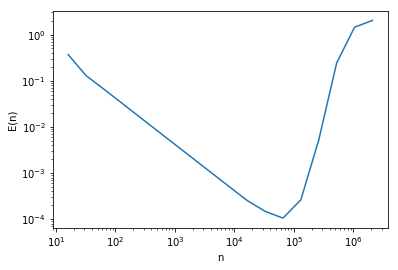

In [4]:
errors = []
Ns = [2**i for i in range(4,22)]
for N in Ns:
    # eps*y'' - y' = -1
    # y(0) = alpha, y(1) = beta
    alpha = 2
    beta = 4
    epsilon = .02
    X = np.linspace(0,1,N)

    def phi(i, x):
        xminus, xi, xplus = X[i-1:i+2]
        if x >= xminus and x <= xplus:
            if x <= xi:
                return (x - xminus)/(xi - xminus)
            else:
                return (xplus - x)/(xplus - xi)
        else:
            return 0

    def a(i, j):
        if j == i+1:
            return .5 + epsilon/(X[i+1] - X[i])
        elif j == i:
            return -epsilon/(X[i] - X[i-1]) - epsilon/(X[i+1] - X[i])
        elif j == i-1:
            return epsilon/(X[i] - X[i-1]) - .5
        else:
            return 0

    def l(j):
        return -.5*(X[j+1] - X[j-1])

    a = np.vectorize(a)
    l = np.vectorize(l)

    Phi = l(np.arange(1,N-1))
    Phi = np.concatenate(([alpha],Phi, [beta]))

    diag0 = np.concatenate(([1.], a(np.arange(1,N-1), np.arange(1, N-1)), [1.]))
    diagUp = np.concatenate(([0., 0.], a(np.arange(2, N), np.arange(1,N-1))))
    diagDown = np.concatenate((a(np.arange(0,N-2), np.arange(1,N-1)), [0., 0.]))
    ab = np.vstack((diagUp, diag0, diagDown))

    K = la.solve_banded((1,1), ab, Phi)

    def yhat(x):
        j = np.argmin(np.abs(X - x))
        if j != 0 and j != 100:
            if x >= X[j]:
                return K[j]*phi(j, x) + K[j+1]*phi(j+1,x)
            else:
                return K[j]*phi(j, x) + K[j-1]*phi(j-1,x)
    vect_yhat = np.vectorize(yhat)

    analytic_y = lambda x: alpha + x + (beta - alpha - 1)*((np.exp(x/epsilon) - 1)/(np.exp(1./epsilon) - 1))
    errors.append(la.norm(K - analytic_y(X), ord=1))
    
plt.loglog(Ns, errors, label="Even Grid")
plt.xlabel('n')
plt.ylabel('E(n)')
plt.show()